In [1]:
import numpy as np
import pandas as pd
import math

In [3]:
data = pd.read_csv('~/new_york_listings_2024.csv')

# EDA

In [4]:
data.shape

(20758, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [6]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [7]:
missing_values_percent = round(100*data.isnull().sum()/data.shape[0],2)
missing_values_percent

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
number_of_reviews_ltm             0.0
license                           0.0
rating                            0.0
bedrooms                          0.0
beds                              0.0
baths                             0.0
dtype: float64

In [8]:
data[data.duplicated() == True]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths


# Object Data Simplification

In [9]:
data['name'].value_counts()

name
Rental unit in New York · 1 bedroom · 1 bed · 1 bath                    409
Rental unit in New York · ★5.0 · 1 bedroom · 1 bed · 1 bath             235
Rental unit in Brooklyn · 1 bedroom · 1 bed · 1 bath                    201
Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1 bed · 1 bath             173
Rental unit in Brooklyn · 1 bedroom · 1 bed · 1 shared bath             158
                                                                       ... 
Rental unit in Brooklyn · ★4.52 · 1 bedroom · 3 beds · 1 bath             1
Rental unit in Brooklyn · ★4.83 · 2 bedrooms · 1 bed · 1 shared bath      1
Townhouse in Queens · ★4.33 · 2 bedrooms · 3 beds · 1 bath                1
Rental unit in New York · ★4.50 · 1 bedroom · 1 bed · 1 private bath      1
Rental unit in New York · ★4.46 · 1 bedroom · 2 beds · 1 bath             1
Name: count, Length: 9836, dtype: int64

In [10]:
# Since the first part of the Name is not in other columns we can filter for it:
data['name'].str[:6].value_counts()

name
Rental    13202
Home i     2889
Condo      1207
Townho     1063
Loft i      467
Hotel       428
Guest       417
Servic      370
Boutiq      275
Place        90
Guesth       78
Bed an       54
Aparth       53
casa p       45
Vacati       33
Bungal       20
Villa        13
Tiny h       11
Hostel        8
Resort        6
Earthe        5
Houseb        5
Cottag        4
Religi        3
Camper        3
Floor         2
Boat i        2
Ranch         1
Castle        1
Lighth        1
Farm s        1
Barn i        1
Name: count, dtype: int64

In [11]:
data['name'] = data['name'].str[:7]

In [12]:
data['host_name'].value_counts(dropna=False)

host_name
Jeniffer           184
Urban Furnished    176
Michael            148
David              144
Stay With Vibe     113
                  ... 
Maud                 1
Raych                1
Alessio              1
Adrien               1
Glenroy              1
Name: count, Length: 5815, dtype: int64

In [13]:
#let's separate out business names from the personal names
vc = data[~data['host_name'].isin(['Urban Furnished', 'Stay With Vibe', 'Blueground', 'Untitled', 'The Box House Hotel',
'Studioplus', 'AFI Apartments', 'Furnished Quarters', 'MyNyHousing', 'The Local Stay' , 'Sonder (NYC)', 'Shoreham',
                                  'RoomPicks','Boomerang'])]['host_name'].value_counts()
vc[vc > 40] 

host_name
Jeniffer       184
Michael        148
David          144
Maria           98
Hiroki          87
Alex            87
Daniel          87
Kaz             82
Michelle        82
John            78
Anthony         77
Stanley         76
Shogo           70
Andrew          65
Jose            64
Karen           64
Momoyo          62
Kevin           60
Anastasia       60
Anna            60
Joseph          59
Eugene          58
Mark            58
Jessica         56
Jason           56
Amy             56
Eliza           56
Leo             52
Julia           51
Jonathan        50
Chris           49
Sarah           49
Benjamin        49
Patrick         48
Mike            47
Jennifer        47
Kristina        46
Christopher     44
Steven          44
James           43
Nathan          43
Lisa            43
Inna            43
Robert          42
Avi             41
Name: count, dtype: int64

In [14]:
# Assuming no selection bias across personal names, we can change them all to "Human"
data.loc[~data['host_name'].isin(['Urban Furnished', 'Stay With Vibe', 'Blueground', 'Untitled', 'The Box House Hotel',
'Studioplus', 'AFI Apartments', 'Furnished Quarters', 'MyNyHousing', 'The Local Stay' , 'Sonder (NYC)', 'Shoreham', 
                                  'RoomPicks','Boomerang']),
         'host_name'] = 'Human'

In [15]:
data['host_name'].value_counts(dropna=False,normalize=True) * 100

host_name
Human                  95.861836
Urban Furnished         0.847866
Stay With Vibe          0.544368
Blueground              0.515464
Sonder (NYC)            0.390211
Furnished Quarters      0.289045
MyNyHousing             0.250506
The Local Stay          0.250506
RoomPicks               0.221601
Shoreham                0.211966
Boomerang               0.211966
AFI Apartments          0.149340
The Box House Hotel     0.101166
Studioplus              0.101166
Untitled                0.052992
Name: proportion, dtype: float64

In [16]:
# since 96% are human while 4% are divided among 14, this variable is not important and can be dropped.
data = data.drop('host_name', axis =1)

In [17]:
data['neighbourhood_group'].value_counts(dropna=False) 

neighbourhood_group
Manhattan        8038
Brooklyn         7719
Queens           3761
Bronx             949
Staten Island     291
Name: count, dtype: int64

In [18]:
data['neighbourhood'].value_counts(dropna=False)

neighbourhood
Bedford-Stuyvesant            1586
Harlem                        1063
Williamsburg                   969
Midtown                        942
Hell's Kitchen                 867
                              ... 
Lighthouse Hill                  1
Bay Terrace, Staten Island       1
Navy Yard                        1
Neponsit                         1
Chelsea, Staten Island           1
Name: count, Length: 221, dtype: int64

In [19]:
# Since this variable would lead to 221 dummy variables, let's convert it to a value_count which indicates how 
# many Airbnbs are in the same neighborhood
nb_counts = data['neighbourhood'].value_counts(dropna=False)
data['nb_count'] = data['neighbourhood'].map(nb_counts)
data = data.drop('neighbourhood', axis = 1)

In [20]:
data['room_type'].value_counts(dropna=False)

room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: count, dtype: int64

In [21]:
data['last_review'].value_counts(dropna=False)

last_review
2023-09-04    326
2023-12-03    255
2023-12-17    244
2023-09-05    223
2023-11-30    212
             ... 
2021-11-03      1
2016-07-31      1
2021-05-16      1
2021-02-03      1
2019-07-11      1
Name: count, Length: 1878, dtype: int64

In [22]:
pd.to_datetime(max(data['last_review']))

Timestamp('2024-01-05 00:00:00')

In [23]:
# Let's change this fields to number of days going back from the latest review date
reference_date = pd.to_datetime(max(data['last_review']))

# Calculate the number of days since the latest review date
data['last_review'] = (reference_date- pd.to_datetime(data['last_review'])).dt.days

In [24]:
data['last_review'].value_counts(dropna=False)

last_review
123     326
33      255
19      244
122     223
36      212
       ... 
793       1
2714      1
964       1
1066      1
1639      1
Name: count, Length: 1878, dtype: int64

In [25]:
data['license'].value_counts(dropna=False)

license
No License            17569
Exempt                 2135
OSE-STRREG-0000068       14
OSE-STRREG-0008664        6
OSE-STRREG-0000437        6
                      ...  
OSE-STRREG-0000131        1
OSE-STRREG-0000288        1
OSE-STRREG-0000215        1
OSE-STRREG-0000985        1
OSE-STRREG-0000513        1
Name: count, Length: 879, dtype: int64

In [26]:
#Assuming no selection bias between license numbers, we can convert all "OSE..." to one value
data.loc[data['license'].str[:3].isin(['OSE','ose','Ose']),'license'] = 'OSE'

In [27]:
data['license'].value_counts(dropna=False)

license
No License    17569
Exempt         2135
OSE            1054
Name: count, dtype: int64

In [28]:
data['rating'].value_counts(dropna=False)

rating
No rating    3593
5.0          2882
4.67          517
4.75          469
4.80          439
             ... 
4.02            1
3.42            1
3.73            1
3.26            1
2.75            1
Name: count, Length: 162, dtype: int64

Matplotlib is building the font cache; this may take a moment.


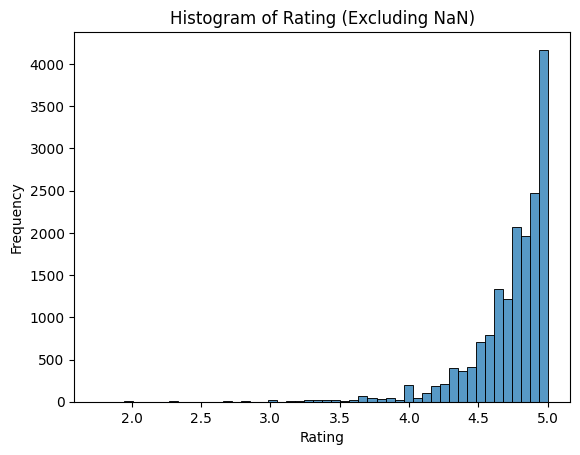

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the histogram using seaborn
sns.histplot(pd.to_numeric(data['rating'], errors='coerce'), bins=50, kde=False, stat="count")
plt.title('Histogram of Rating (Excluding NaN)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [31]:
#  Since "No rating" AirBnBs are typically new or unused ones that customers would not rely on, we can assign a low
#  score close to the bottom 10% quantile value
pd.to_numeric(data['rating'], errors='coerce').quantile(0.1)

np.float64(4.39)

In [33]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating'] = data['rating'].fillna(4.39)
data['rating'].value_counts(dropna=False)

rating
4.39    3785
5.00    2882
4.67     517
4.75     469
4.80     439
        ... 
3.64       1
3.38       1
2.50       1
3.26       1
2.75       1
Name: count, Length: 160, dtype: int64

In [34]:
data['bedrooms'].value_counts(dropna=False)

bedrooms
1         13439
2          3602
Studio     1815
3          1394
4           345
5           112
6            29
7             9
9             6
8             5
15            1
14            1
Name: count, dtype: int64

In [35]:
# let's replace studio with 0 bedrooms and make the field numeric
data['bedrooms'] = pd.to_numeric(data['bedrooms'], errors='coerce')
data['bedrooms'] = data['bedrooms'].fillna(0)
data['bedrooms'].value_counts(dropna=False)

bedrooms
1.0     13439
2.0      3602
0.0      1815
3.0      1394
4.0       345
5.0       112
6.0        29
7.0         9
9.0         6
8.0         5
15.0        1
14.0        1
Name: count, dtype: int64

In [36]:
data['baths'].value_counts(dropna=False)

baths
1                17015
2                 2082
1.5               1001
2.5                240
3                  171
0                   82
4                   69
3.5                 50
4.5                 18
Not specified       13
5                    6
6                    4
5.5                  2
6.5                  2
11.5                 1
7                    1
15.5                 1
Name: count, dtype: int64

In [37]:
# if baths are not specified, customers are likely to assume no bathroom (only a toilet) in NYC
data['baths'] = pd.to_numeric(data['baths'], errors='coerce')
data['baths'] = data['baths'].fillna(0)
data['baths'].value_counts(dropna=False)

baths
1.0     17015
2.0      2082
1.5      1001
2.5       240
3.0       171
0.0        95
4.0        69
3.5        50
4.5        18
5.0         6
6.0         4
5.5         2
6.5         2
11.5        1
7.0         1
15.5        1
Name: count, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   neighbourhood_group             20758 non-null  object 
 4   latitude                        20758 non-null  float64
 5   longitude                       20758 non-null  float64
 6   room_type                       20758 non-null  object 
 7   price                           20758 non-null  float64
 8   minimum_nights                  20758 non-null  int64  
 9   number_of_reviews               20758 non-null  int64  
 10  last_review                     20758 non-null  int64  
 11  reviews_per_month               20758 non-null  float64
 12  calculated_host_listings_count  

# Eliminate Outliers

In [39]:
# let's look for any outliers in the numerical data
df =data.drop(columns=['id','host_id','name','neighbourhood_group','latitude','longitude','room_type','license'], axis=1)

In [40]:
df.describe()

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths,nb_count
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000
mean,187.776616,28.558435,42.642596,314.479911,1.257910,18.844108,205.990317,10.852105,4.67203,1.306725,1.723721,1.177257,505.662973
std,1022.797208,33.536518,73.561654,526.390418,1.904661,70.910834,135.087768,21.357071,0.29757,0.877419,1.212272,0.481209,456.729205
min,10.000000,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,1.75000,0.000000,1.000000,0.000000,1.000000
25%,80.000000,30.000000,4.000000,41.000000,0.210000,1.000000,87.000000,1.000000,4.39000,1.000000,1.000000,1.000000,136.000000
50%,125.000000,30.000000,14.000000,107.000000,0.650000,2.000000,215.000000,3.000000,4.75000,1.000000,1.000000,1.000000,328.000000
75%,199.000000,30.000000,49.000000,272.000000,1.800000,5.000000,353.000000,15.000000,4.91000,2.000000,2.000000,1.000000,867.000000
max,100000.000000,1250.000000,1865.000000,4409.000000,75.490000,713.000000,365.000000,1075.000000,5.00000,15.000000,42.000000,15.500000,1586.000000


In [41]:
#let's look at outliers:
# 1. $ price more than $5000 a night where it is not a hotel room or entire home
data[(data['price']>5000) & (~data['room_type'].isin(['Entire home/apt','Hotel room']))]

,id,name,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,nb_count
901,38993679,Boutiqu,298338860,Manhattan,40.75088,-73.98644,Private room,10000.0,30,1,...,0.02,3,365,0,Exempt,4.39,1.0,1,1.0,942
3026,31219800,Loft in,172226912,Manhattan,40.74931,-73.97830,Shared room,10000.0,40,10,...,0.17,1,0,0,No License,4.50,4.0,5,2.0,207
3140,38993493,Boutiqu,298338860,Manhattan,40.74924,-73.98722,Private room,10000.0,30,5,...,0.10,3,365,0,Exempt,3.40,1.0,2,1.0,942
3990,17160286,Rental,110361431,Brooklyn,40.69085,-73.93806,Private room,100000.0,30,29,...,0.96,2,346,10,No License,4.48,1.0,1,1.0,1586
4528,38993556,Boutiqu,298338860,Manhattan,40.74863,-73.98493,Private room,10000.0,30,3,...,0.06,3,365,0,Exempt,3.33,1.0,1,1.0,942
5492,605115521796576121,Rental,110361431,Brooklyn,40.69254,-73.93636,Private room,100000.0,30,9,...,0.45,2,365,5,No License,4.33,1.0,1,1.0,1586
7857,15345019,Place t,88972153,Brooklyn,40.73068,-73.95741,Private room,7500.0,31,29,...,0.55,1,358,0,No License,4.76,2.0,1,1.0,301
10894,49920227,Home in,76699286,Bronx,40.82456,-73.88819,Private room,9994.0,30,10,...,0.32,1,365,0,No License,4.30,1.0,1,1.0,31
15054,9528920,Rental,3906464,Manhattan,40.71302,-73.98573,Private room,7314.0,99,6,...,0.06,1,83,0,No License,4.33,1.0,1,1.0,328


In [42]:
condition1 = data[(data['price']>5000) & (~data['room_type'].isin(['Entire home/apt','Hotel room']))].index
data = data.drop(condition1)

In [43]:
#let's look at outliers:
# 2. $ price less than $25 a night where it is an entire home or hotel room
data[(data['price']<=25) & (data['room_type'].isin(['Entire home/apt','Hotel room']))]

,id,name,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,nb_count
1051,838222335282904975,Rental,213615269,Brooklyn,40.688887,-73.927008,Entire home/apt,10.0,30,11,...,1.10,1,178,11,No License,4.55,1.0,3,1.0,1586
2865,22869573,Loft in,17631246,Manhattan,40.729920,-73.988260,Entire home/apt,10.0,30,56,...,0.78,1,0,4,No License,4.91,1.0,1,1.0,413
3344,49409612,Rental,24641078,Manhattan,40.777960,-73.960730,Entire home/apt,10.0,30,7,...,0.24,4,48,3,No License,5.00,1.0,2,1.0,786
5259,752408660870357666,Rental,173864851,Manhattan,40.707041,-74.015810,Entire home/apt,10.0,30,8,...,0.64,1,129,7,No License,5.00,0.0,1,1.0,25
6293,983365571301360993,Rental,69852641,Manhattan,40.764730,-73.986968,Entire home/apt,20.0,30,1,...,1.00,3,353,1,No License,4.39,4.0,4,2.0,867
8561,31085554,Rental,185265758,Manhattan,40.821670,-73.948260,Entire home/apt,10.0,30,65,...,1.08,3,358,1,No License,4.83,2.0,3,2.0,1063
9120,53167175,Rental,24641078,Manhattan,40.776880,-73.961080,Entire home/apt,10.0,30,8,...,0.38,4,135,4,No License,5.00,1.0,1,1.0,786
15751,42502510,Rental,316423586,Brooklyn,40.690990,-73.926030,Entire home/apt,10.0,30,14,...,1.71,2,180,14,No License,4.86,1.0,2,1.0,1586


In [44]:
condition2 = data[(data['price']<=25) & (data['room_type'].isin(['Entire home/apt','Hotel room']))].index
data = data.drop(condition2)

In [45]:
#let's look at outliers:
# 3. min nights more than 365 which is not normal for an AirBnB
df[(df['minimum_nights']>365)]

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths,nb_count
77,200.0,700,7,48,0.25,1,95,5,4.86,1.0,1,1.0,211
583,85.0,1000,21,56,1.75,4,365,21,4.33,1.0,1,2.0,131
864,200.0,400,1,527,0.06,1,365,0,4.39,1.0,1,1.0,786
918,50.0,1000,2,1460,0.04,1,0,0,4.39,1.0,1,1.0,52
1419,85.0,1000,8,96,0.72,4,365,8,4.38,1.0,1,2.0,131
1424,85.0,1000,5,67,1.18,4,365,5,3.80,1.0,1,2.0,131
2012,85.0,1000,19,122,1.46,3,365,16,4.26,1.0,1,1.0,324
2013,85.0,1000,14,107,1.06,3,365,12,3.93,1.0,1,1.0,324
2695,85.0,1000,27,90,2.01,3,365,24,4.07,1.0,1,1.0,324
3088,500.0,500,11,1389,0.21,1,90,0,4.64,1.0,1,1.0,786


In [46]:
condition3 = data[(data['minimum_nights']>365)].index
data = data.drop(condition3)

In [47]:
#let's look at outliers:
# 4. Number of reviews in the last month was more than 100, which could be a sign of fraud
df[(df['number_of_reviews_ltm']>=100)]

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths,nb_count
251,80.0,1,120,1,8.41,4,301,109,4.57,1.0,1,1.0,66
1341,60.0,1,379,1,6.84,1,136,115,4.77,1.0,1,1.0,190
2132,175.0,1,154,10,12.42,2,101,152,4.66,0.0,2,1.0,366
2384,144.0,1,1865,3,37.00,4,317,303,4.54,1.0,1,1.0,413
2525,134.0,1,1128,20,23.60,4,301,192,4.41,1.0,1,1.0,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19557,128.0,30,145,42,9.31,1,0,105,4.98,1.0,2,1.0,19
19662,169.0,1,166,4,8.72,1,337,105,4.92,1.0,2,1.0,91
19698,100.0,1,451,1,12.24,4,0,175,4.42,1.0,1,1.0,66
19716,114.0,1,139,4,8.99,1,337,117,4.90,2.0,2,1.0,241


In [48]:
data['number_of_reviews_ltm'].quantile(0.9973)
# More than 3-sigma deviation in number of ratings last month

np.float64(105.04789999999775)

In [49]:
data[(data['number_of_reviews_ltm']>105)]

,id,name,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,nb_count
251,750934716608055913,Home in,381374171,Queens,40.672011,-73.811453,Private room,80.0,1,120,...,8.41,4,301,109,OSE,4.57,1.0,1,1.0,66
1341,35808578,Home in,269375490,Brooklyn,40.644080,-73.891510,Private room,60.0,1,379,...,6.84,1,136,115,OSE,4.77,1.0,1,1.0,190
2132,741730313598556488,Rental,446770142,Manhattan,40.748530,-73.989090,Entire home/apt,175.0,1,154,...,12.42,2,101,152,Exempt,4.66,0.0,2,1.0,366
2384,37122502,Boutiqu,266755066,Manhattan,40.723800,-73.990380,Private room,144.0,1,1865,...,37.00,4,317,303,Exempt,4.54,1.0,1,1.0,413
2525,37122162,Boutiqu,266755066,Manhattan,40.722590,-73.988410,Private room,134.0,1,1128,...,23.60,4,301,192,Exempt,4.41,1.0,1,1.0,328
4099,757318950542595961,Guest s,92900025,Queens,40.684669,-73.747327,Private room,70.0,30,119,...,10.41,3,365,119,No License,4.99,1.0,1,1.0,50
5094,585368495763668792,Hotel i,449715737,Manhattan,40.759125,-73.983765,Private room,162.0,1,120,...,8.76,4,331,117,Exempt,4.07,1.0,2,1.0,140
6409,53843545,Hotel i,435369966,Manhattan,40.710026,-74.011360,Private room,148.0,1,1574,...,68.93,7,364,526,Exempt,4.42,1.0,1,1.0,204
6570,691676460109271194,Loft in,470859718,Manhattan,40.718060,-74.000950,Entire home/apt,88.0,1,1048,...,61.65,17,240,733,Exempt,4.57,1.0,1,1.0,158
6953,667316357375615620,Hotel i,468527022,Manhattan,40.717590,-74.000200,Private room,128.0,1,297,...,16.88,8,0,176,Exempt,4.72,0.0,1,1.0,158


In [50]:
condition4 = data[(data['number_of_reviews_ltm']>=105)].index
data = data.drop(condition4)

In [51]:
#let's look at outliers:
# 5. Number of baths/beds ratio is high
data[(data['baths']/data['beds'] > 4)]

,id,name,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,nb_count
1909,52041617,Hotel i,418449940,Manhattan,40.74750,-73.99473,Private room,225.0,30,178,...,6.25,2,114,78,No License,4.72,1.0,1,6.0,366
6037,5274268,Rental,9147223,Manhattan,40.79519,-73.94988,Private room,125.0,30,19,...,0.19,1,353,0,No License,4.84,1.0,1,11.5,375
8839,39114171,Home in,48684597,Queens,40.73637,-73.89600,Private room,55.0,30,6,...,0.12,6,0,0,No License,4.83,1.0,1,4.5,69


In [52]:
# 1909 is in a hotel possibly with many bathrooms 
# 6037 looks like a typo, it should be 1.5 baths
# 8839 is in a home with possibly many bathrooms

data.loc[6037, 'baths'] = 1.5

In [53]:
data['id'].value_counts()

id
1312228               1
752124417745502491    1
32244865              1
898762908764470763    1
50350784              1
                     ..
29909077              1
2214710               1
32381165              1
15181459              1
566029911248687183    1
Name: count, Length: 20666, dtype: int64

In [54]:
# all unique values with no meaning to the ID number
data = data.drop('id', axis = 1)

In [55]:
data['host_id'].value_counts(dropna=False)

host_id
162280872    146
51501835     129
61391963     113
107434423    107
19303369      87
            ... 
136300414      1
543959         1
49634516       1
346356         1
93827372       1
Name: count, Length: 12418, dtype: int64

In [56]:
data.shape

(20666, 20)

In [57]:
# There are 20674 - 12421 = 8253 duplicated host_IDs, but there are too many categorical variables in this field.
# We can convert host_ID to a value_count variable, so we derive some value from a numerical column

In [58]:
host_id_counts = data['host_id'].value_counts(dropna=False)
data['host_id_count'] = data['host_id'].map(host_id_counts)

In [59]:
data = data.drop('host_id',axis = 1)

In [60]:
data['latitude'].value_counts(dropna=False), data['longitude'].value_counts(dropna=False), 

(latitude
 40.764110    28
 40.761530    17
 40.754360    15
 40.718990    14
 40.749260    13
              ..
 40.690690     1
 40.816060     1
 40.803395     1
 40.656600     1
 40.730580     1
 Name: count, Length: 15340, dtype: int64,
 longitude
 -73.993710    29
 -73.998780    19
 -73.993910    19
 -73.976430    16
 -73.997730    15
               ..
 -73.878500     1
 -73.897850     1
 -73.883580     1
 -73.892860     1
 -73.728651     1
 Name: count, Length: 14445, dtype: int64)

In [61]:
# lets drop these as latitude and longitude numbers do not add value to the model
data = data.drop(['latitude', 'longitude'], axis = 1)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20666 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            20666 non-null  object 
 1   neighbourhood_group             20666 non-null  object 
 2   room_type                       20666 non-null  object 
 3   price                           20666 non-null  float64
 4   minimum_nights                  20666 non-null  int64  
 5   number_of_reviews               20666 non-null  int64  
 6   last_review                     20666 non-null  int64  
 7   reviews_per_month               20666 non-null  float64
 8   calculated_host_listings_count  20666 non-null  int64  
 9   availability_365                20666 non-null  int64  
 10  number_of_reviews_ltm           20666 non-null  int64  
 11  license                         20666 non-null  object 
 12  rating                          20666

# Skewness of Price

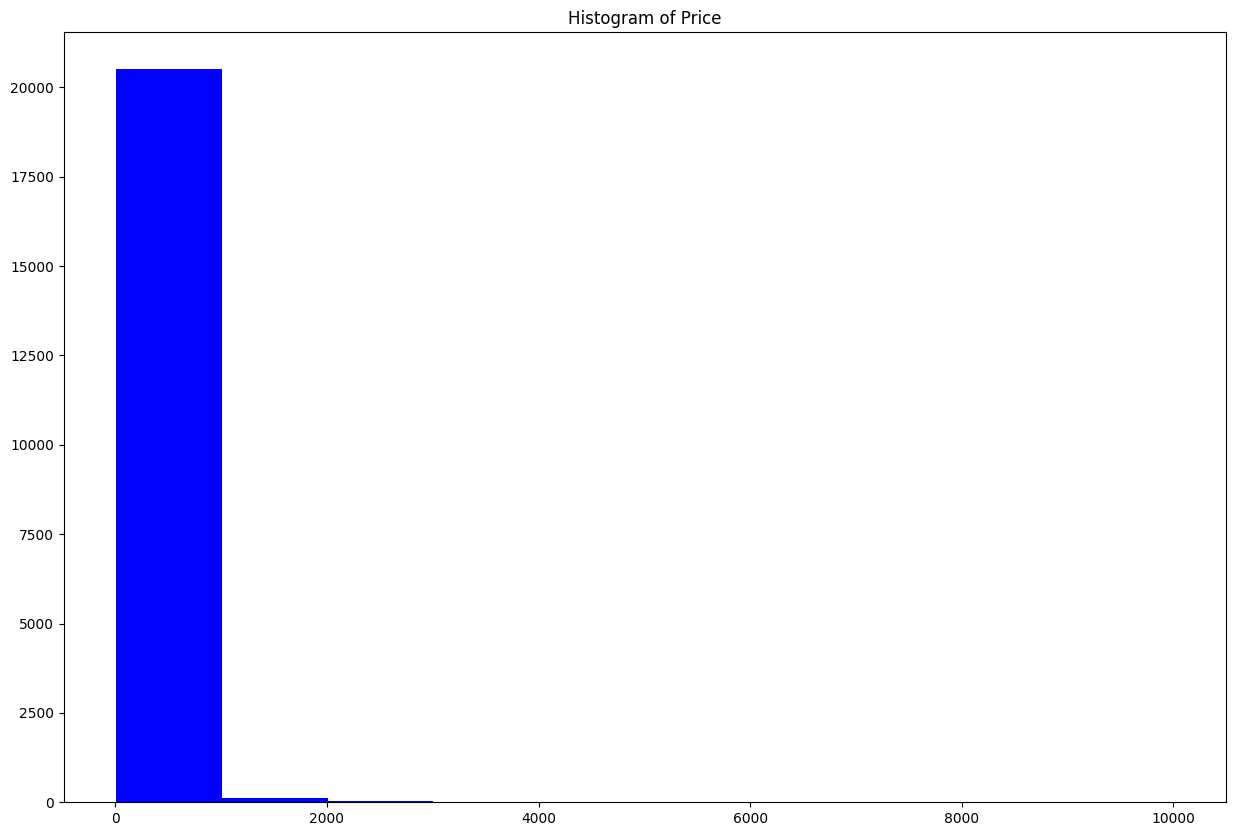

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.hist(data['price'], facecolor = 'blue')
plt.title('Histogram of Price')
plt.show()

### Since price is highly skewed and therefore hard to predict, we can remove the skewness with a BoxCox transformation

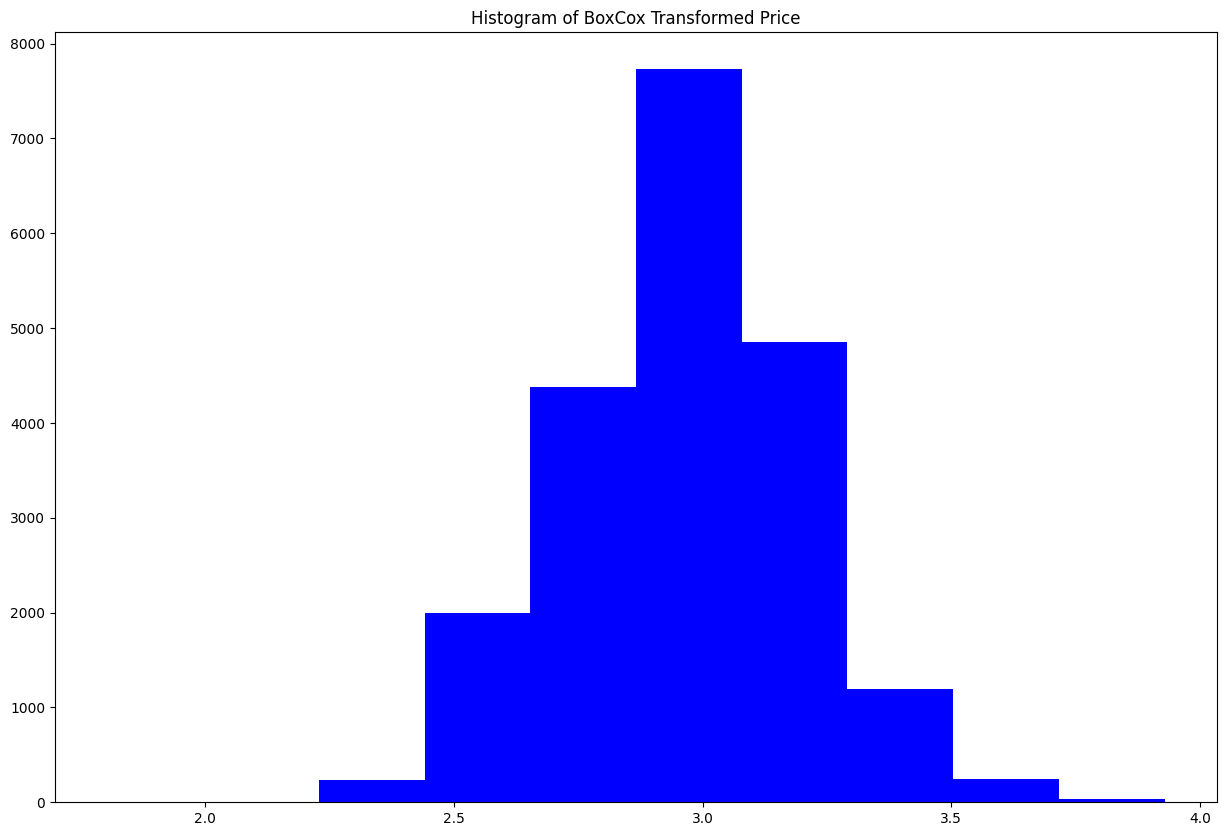

In [65]:
#using BoxCox:
from scipy import stats
plt.figure(figsize=(15,10))
plt.hist(stats.boxcox(data.price)[0], facecolor = 'blue')
plt.title('Histogram of BoxCox Transformed Price')
plt.show()

In [66]:
data['price-transform'] = stats.boxcox(data.price)[0]
data['price-transform'].value_counts()

price-transform
2.887312    656
3.027206    575
2.951773    416
3.119115    403
2.965852    351
           ... 
3.301406      1
3.552191      1
3.620870      1
3.546295      1
3.378233      1
Name: count, Length: 781, dtype: int64

In [67]:
data = data.drop('price',axis = 1)

In [68]:
data.shape

(20666, 18)

In [70]:
data.to_csv('processed_data.csv', index=False)